# Contact Tracing Extinction Times

In [1]:
import matplotlib.pyplot as plt
import numpy.random as npr
import scipy.stats as ss
import seaborn as sns
import household_contact_tracing as model
import warnings
import numpy as np
warnings.filterwarnings('ignore')
sns.set()

## Simulation

The simulation functions considering the outbreak as a branching process. For now, we treat the population as entirely susceptible.

#### Code import & setting up

In [2]:
simulation = model.household_sim_contact_tracing(haz_rate_scale = 0.805,
                                                contact_tracing_success_prob = 2/3,
                                                prob_of_successful_contact_trace_today = 1/3,
                                                infection_reporting_prob = 0.7,
                                                reporting_delay_par = 1/2,
                                                contact_trace = True,
                                                reduce_contacts_by = 0.0, # 0.1 means a person makes 10% less global contacts
                                                only_isolate_if_symptoms = False) 

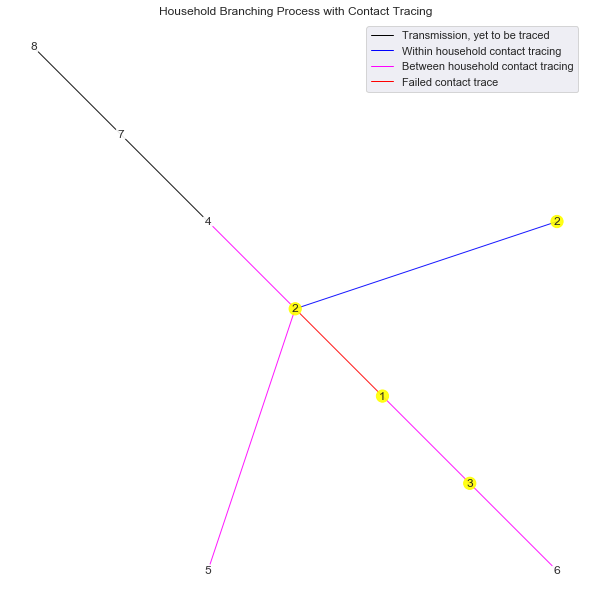

In [3]:
npr.seed(2)
simulation.run_simulation(time_out = 13)
simulation.draw_network()

In [4]:
simulation.house_dict[2]

{'size': 3,
 'time': 5,
 'susceptibles': 1,
 'isolated': True,
 'contact_traced': True,
 'time_until_contact_traced': inf,
 'being_contact_traced_from': None,
 'generation': 1,
 'infected_by': 1,
 'spread_to': [4, 5],
 'nodes': [2, 4],
 'infected_by_node': 0,
 'within_house_edges': [(2, 4)],
 'had_contacts_traced': False}

In [5]:
simulation.G.nodes[2]

{'time_infected': 5,
 'generation': 1,
 'household': 2,
 'contact_traced': True,
 'isolated': True,
 'symptom_onset': 8,
 'outside_house_contacts_made': 50.0,
 'had_contacts_traced': False,
 'spread_to': [4, 5, 6],
 'serial_interval': 5,
 'recovered': False,
 'recovery_time': 26,
 'will_report_infection': True,
 'reporting_time': 10,
 'has_trace_app': False}

* Yellow means a case has been isolated and displays symptoms
* The numbers are the house ID

Running the simulation 10000 times.

Percentage Extinct after 360 days: 100.0%
Remember, this is for a single starting infection
CPU times: user 7min 42s, sys: 30.6 s, total: 8min 12s
Wall time: 7min 56s


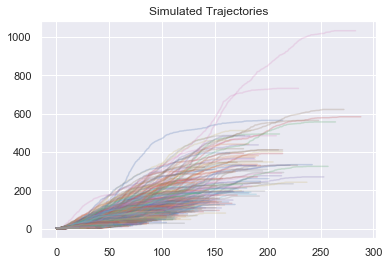

In [6]:
%%time
npr.seed(1000)
# Set up the simulation
simulation = model.household_sim_contact_tracing(haz_rate_scale = 0.805,
                                                contact_tracing_success_prob = 2/3,
                                                prob_of_successful_contact_trace_today = 1/2,
                                                infection_reporting_prob = 0.7,
                                                reporting_delay_par = 1/4.8,
                                                contact_trace = True,
                                                reduce_contacts_by = 0.7,
                                                only_isolate_if_symptoms = False)

# Code to repeat the simulation and report the output
npr.seed(1)
days_to_simulate = 360
number_of_repeats = 10000
times_went_extinct = 0

extinction_times = []
final_size = []

for repeat in range(number_of_repeats):
    print(f"repeat: {repeat}/{number_of_repeats}", end = "\r")
    
    simulation.run_simulation(days_to_simulate)
    plt.plot(simulation.total_cases, alpha = 0.25)
    
    if simulation.died_out == True:
        times_went_extinct += 1
        extinction_times.append(simulation.time)
        
        final_size.append(simulation.inf_counts[-1])
plt.title("Simulated Trajectories")
print(f"Percentage Extinct after {days_to_simulate} days: {times_went_extinct*100/number_of_repeats}%")
print("Remember, this is for a single starting infection")

Text(0, 0.5, 'Frequency')

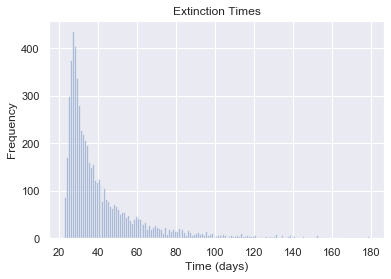

In [7]:
sns.distplot(extinction_times, kde = False, bins = range(23, 180))
plt.title("Extinction Times")
plt.xlabel("Time (days)")
plt.ylabel("Frequency")

In [8]:
extinction_times_sub = [ext_time for ext_time in extinction_times if ext_time > 23]

Fitting a generalized extreme value distribution

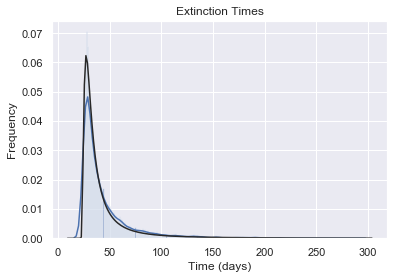

In [9]:
sns.distplot(extinction_times_sub, bins = range(23, 180), fit = ss.genextreme)
plt.title("Extinction Times")
plt.xlabel("Time (days)")
plt.ylabel("Frequency")
plt.savefig("Extinction Times density.pdf")

In [10]:
np.mean(extinction_times)

35.9978